<a href="https://colab.research.google.com/github/capitallatera/Project_1/blob/master/Minic_Dataset_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# if not installed
# pip3 install psycopg2

In [52]:
# Importing Libraries
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Connecting the Database
con = psycopg2.connect(database="mimic", user="datascientist", password="candidate", host="3.7.155.14", port="5432")
print("Database opened Successfully")

Database opened Successfully


In [54]:
# Fetching the data 
query='SET search_path to public; select * from scorecalc_1'
# DataFrame
df=pd.read_sql_query(query,con) 

In [55]:
# Required Columns for calculating sofa score
print(list(df.columns[1:]))

['respiration', 'coagulation', 'liver', 'cardiovascular', 'cns', 'renal']


Questions 1

In [56]:
# Creating DataFrame
df_1=pd.DataFrame(df[list(df.columns[1:])])  
# filling the null values
df_1.fillna(0,inplace=True)
# showing tables
df_1.head()

,respiration,coagulation,liver,cardiovascular,cns,renal
0,0.0,4.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,4.0,0.0,3.0
2,2.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,4.0


Calculating Sofa Score

In [57]:
# Computing Sofa Score
df_2=df_1.assign(score=lambda x:(x['respiration']+x['coagulation']+x['liver']+x['cardiovascular']+x['cns']+x['renal']))

In [58]:
# Displaying sofa score column
df_2.head() 

,respiration,coagulation,liver,cardiovascular,cns,renal,score
0,0.0,4.0,0.0,0.0,0.0,0.0,4.0
1,0.0,0.0,0.0,4.0,0.0,3.0,7.0
2,2.0,0.0,1.0,1.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,4.0,4.0


Visualization

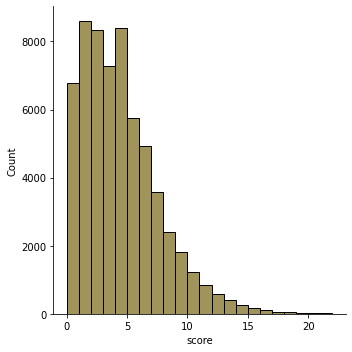

In [59]:
# Plotting the Sofa score
sns.displot(df_2,x="score",binwidth=1,color='#817123')

In [60]:
# Fetching the data
query='SET search_path to mimiciii; select * from admissions '
df=pd.read_sql_query(query,con)

Question 2

In [61]:
# Total Admissions
print("The Total number of Admissions are {}".format(df.shape[0]))

The Total number of Admissions are 58976


Question 3

In [62]:
# Admissions under Energency
percentage=(df[df.admission_type=="EMERGENCY"].shape[0]/df.shape[0])*100
print("Percentage of Admissions was under Emergency {}".format(round(percentage,2)))

Percentage of Admissions was under Emergency 71.34


Question 4

Counts of Various types of Admissions


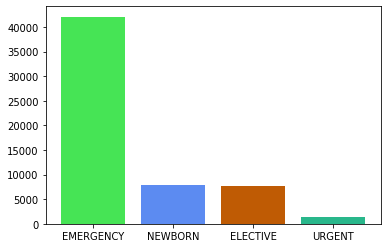

In [63]:
print("Counts of Various types of Admissions")

name=["EMERGENCY","NEWBORN","ELECTIVE","URGENT"]
value=list(df.admission_type.value_counts())

fig=plt.figure()
plt.bar(name,value,color=['#46E455',"#5C8BF1","#BF5B04","#29B78B", "#581963"])
plt.show()